In [1]:
import scanpy as sc
import os
import pandas as pd
import scvi
from anndata import concat as ad_concat

In [2]:
base_dir = "../Data/"
h5ad_files = [
    "Axelrod_ML_et_al.h5ad",
    "Huang_Yuhsin_Vivian_et_al.h5ad",
    "Hua_Xiumeng_et_al.h5ad",
    "Mantri_M_et_al.h5ad",
    "Ma_P_et_al.h5ad",
    "Perez_Shibayama_Christian_et_al.h5ad"
]

Axelrod_adata=sc.read_h5ad("../Data/Axelrod_ML_et_al.h5ad")
Huang_adata=sc.read_h5ad("../Data/Huang_Yuhsin_Vivian_et_al.h5ad")
Hua_adata=sc.read_h5ad("../Data/Hua_Xiumeng_et_al.h5ad")
Mantri_adata=sc.read_h5ad("../Data/Mantri_M_et_al.h5ad")
Ma_adata=sc.read_h5ad("../Data/Ma_P_et_al.h5ad")
Perez_adata=sc.read_h5ad("../Data/Perez_Shibayama_Christian_et_al.h5ad")

In [3]:
print("Axelrod_adata"+"\n")
print(Axelrod_adata)
print("Huang_adata"+"\n")
print(Huang_adata)
print("Hua_adata"+"\n")
print(Hua_adata)
print("Mantri_adata"+"\n")
print(Mantri_adata)
print("Ma_adata"+"\n")
print(Ma_adata)
print("Perez_adata"+"\n")
print(Perez_adata)

Axelrod_adata

AnnData object with n_obs × n_vars = 6881 × 16238
    obs: 'sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'scrublet'
Huang_adata

AnnData object with n_obs × n_vars = 221673 × 24180
    obs: 'sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts

In [4]:
adatas = []
print("读取并统一基因命名...")
for file in h5ad_files:
    file_path = os.path.join(base_dir, file)
    adata = sc.read_h5ad(file_path)
    batch_name = file.split('.')[0]
    adata.obs['batch'] = batch_name
    print(f"\n{batch_name}: 原始基因名示例: {adata.var_names.tolist()[:5]}")
    print(f"{batch_name}: var列: {adata.var.columns.tolist()}")
    print(f"{batch_name}数据最小值: {adata.X.min()}")
    print(f"{batch_name}数据最大值:{adata.X.max()}")
    print(f"清理前var形状: {adata.var.shape}, 列数: {len(adata.var.columns)}")
    clean_var = pd.DataFrame(index=adata.var_names)
    adata.var = clean_var
    print(f"清理后var形状: {adata.var.shape}, 列数: {len(adata.var.columns)}")
    adatas.append(adata)

读取并统一基因命名...

Axelrod_ML_et_al: 原始基因名示例: ['0610007P14Rik', '0610009B22Rik', '0610009E02Rik', '0610009L18Rik', '0610009O20Rik']
Axelrod_ML_et_al: var列: ['n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts']
Axelrod_ML_et_al数据最小值: 0.0
Axelrod_ML_et_al数据最大值:3867.0
清理前var形状: (16238, 10), 列数: 10
清理后var形状: (16238, 0), 列数: 0

Huang_Yuhsin_Vivian_et_al: 原始基因名示例: ['0610005C13Rik', '0610009B22Rik', '0610009E02Rik', '0610009L18Rik', '0610009O20Rik']
Huang_Yuhsin_Vivian_et_al: var列: ['n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts']
Huang_Yuhsin_Vivian_et_al数据最小值: 0.0
Huang_Yuhsin_Vivian_et_al数据最大值:10172.0
清理前var形状: (24180, 10), 列数: 10
清理后var形状: (24180, 0), 列数: 0

Hua_Xiumeng_et_al: 原始基因名示例: ['Sox17', 'Mrpl15', 'Lypla1', 'Gm37988', 'Tcea1']
Hua_Xiumeng_et_al: var列: ['n_cells', 'mt', 'ribo', 'hb', 'n_cel

In [5]:

for adata in adatas:
    batch_name = adata.obs['batch'].iloc[0]
    print(f"{batch_name}: {adata.var_names.tolist()[:5]}")
# 获取所有数据集的基因名并集
all_genes = set()
for adata in adatas:
    all_genes.update(adata.var_names)
print(f"\n总共有 {len(all_genes)} 个唯一基因")
# 找出所有数据集共有的基因
common_genes = set(adatas[0].var_names)
for adata in adatas[1:]:
    common_genes = common_genes.intersection(set(adata.var_names))
print(f"所有数据集共有的基因数量: {len(common_genes)}")
integration_genes = list(common_genes)
print(f"使用 {len(integration_genes)} 个共同基因进行整合")
# 为每个数据集提取整合基因
processed_adatas = []
combined_adata = []
for adata in adatas:
    available_genes = [gene for gene in integration_genes if gene in adata.var_names]
    gene_indices = [list(adata.var_names).index(gene) for gene in available_genes]
    subset_data = adata[:, gene_indices]
    processed_adatas.append(subset_data)
    print(f"{adata.obs['batch'].iloc[0]}: 使用 {len(available_genes)} 个整合基因")
    print("\n合并数据集...")
    # 使用新的anndata.concat方法
    combined_adata = ad_concat(
        processed_adatas,
        join='inner',
        label='batch_origin',
        keys=[adata.obs['batch'].iloc[0] for adata in processed_adatas],
        index_unique=None  # 不添加唯一索引后缀
    )
print(f"合并后形状: {combined_adata.shape}")
print(f"合并后var列: {combined_adata.var.columns.tolist()}")


统一后的基因名示例:
Axelrod_ML_et_al: ['0610007P14Rik', '0610009B22Rik', '0610009E02Rik', '0610009L18Rik', '0610009O20Rik']
Huang_Yuhsin_Vivian_et_al: ['0610005C13Rik', '0610009B22Rik', '0610009E02Rik', '0610009L18Rik', '0610009O20Rik']
Hua_Xiumeng_et_al: ['Sox17', 'Mrpl15', 'Lypla1', 'Gm37988', 'Tcea1']
Mantri_M_et_al: ['Xkr4', 'Gm37180', 'Gm37363', 'Gm37686', 'Gm37329']
Ma_P_et_al: ['Xkr4', 'Gm1992', 'Rp1', 'Sox17', 'Gm37323']
Perez_Shibayama_Christian_et_al: ['Xkr4', 'Gm37180', 'Gm37363', 'Gm37686', 'Gm37329']

总共有 36723 个唯一基因
所有数据集共有的基因数量: 13817
使用 13817 个共同基因进行整合
Axelrod_ML_et_al: 使用 13817 个整合基因

合并数据集...
Huang_Yuhsin_Vivian_et_al: 使用 13817 个整合基因

合并数据集...
Hua_Xiumeng_et_al: 使用 13817 个整合基因

合并数据集...
Mantri_M_et_al: 使用 13817 个整合基因

合并数据集...
Ma_P_et_al: 使用 13817 个整合基因

合并数据集...
Perez_Shibayama_Christian_et_al: 使用 13817 个整合基因

合并数据集...
合并后形状: (411394, 13817)
合并后var列: []


In [7]:
combined_adata.var["mt"] = combined_adata.var_names.str.startswith("mt-")
combined_adata.var["ribo"] = combined_adata.var_names.str.contains("^Mrp[ls]")
combined_adata.var["hb"] = combined_adata.var_names.str.contains("^Hb[^(P)]")
sc.pp.calculate_qc_metrics(
    combined_adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)
combined_adata


AnnData object with n_obs × n_vars = 411394 × 13817
    obs: 'sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'batch', 'batch_origin'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [23]:
print("设置SCVI...")
scvi.model.SCVI.setup_anndata(combined_adata,
                              batch_key='sample',
                              categorical_covariate_keys=["batch"],
                              continuous_covariate_keys=['total_counts','pct_counts_mt','pct_counts_ribo']),
print("训练SCVI模型...")
vae = scvi.model.SCVI(
    combined_adata,
    n_layers=2,
    n_latent=30,
    gene_likelihood="zinb"
)
vae.train(
    max_epochs = 30,
    early_stopping = True,
)

设置SCVI...
训练SCVI模型...


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Environment\anaconda3\envs\singlecell\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=43` in the `DataLoader` to improve performance.
C:\Environment\anaconda3\envs\singlecell\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=43` in the `DataLoader` to improve performance.


Training:   0%|          | 0/30 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.


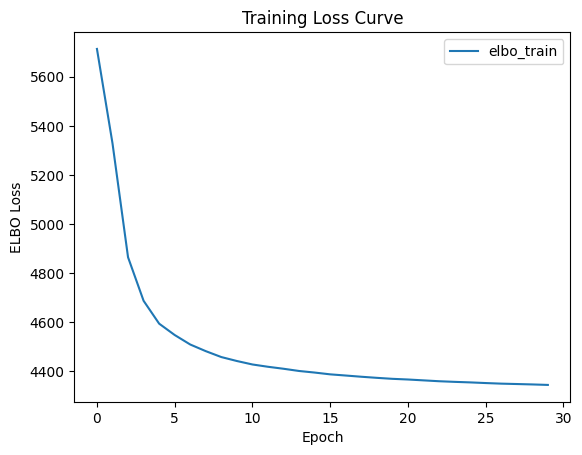

In [25]:
import matplotlib.pyplot as plt
vae.history["elbo_train"].plot()
plt.xlabel("Epoch")
plt.ylabel("ELBO Loss")
plt.title("Training Loss Curve")
plt.show()

In [37]:
vae.save("../model/scVI_model")

In [31]:
combined_adata.obsm["X_scVI"] = vae.get_latent_representation()
combined_adata.obsm["X_normalized_scVI"] = vae.get_normalized_expression()

In [32]:
sc.pp.neighbors(combined_adata, use_rep="X_scVI")
sc.tl.leiden(combined_adata)
sc.tl.umap(combined_adata)
output_path = "../Data/combined_scVI.h5ad"
combined_adata.write_h5ad(output_path)

C:\Users\yuanf\AppData\Local\Temp\ipykernel_48436\4110963752.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(combined_adata)


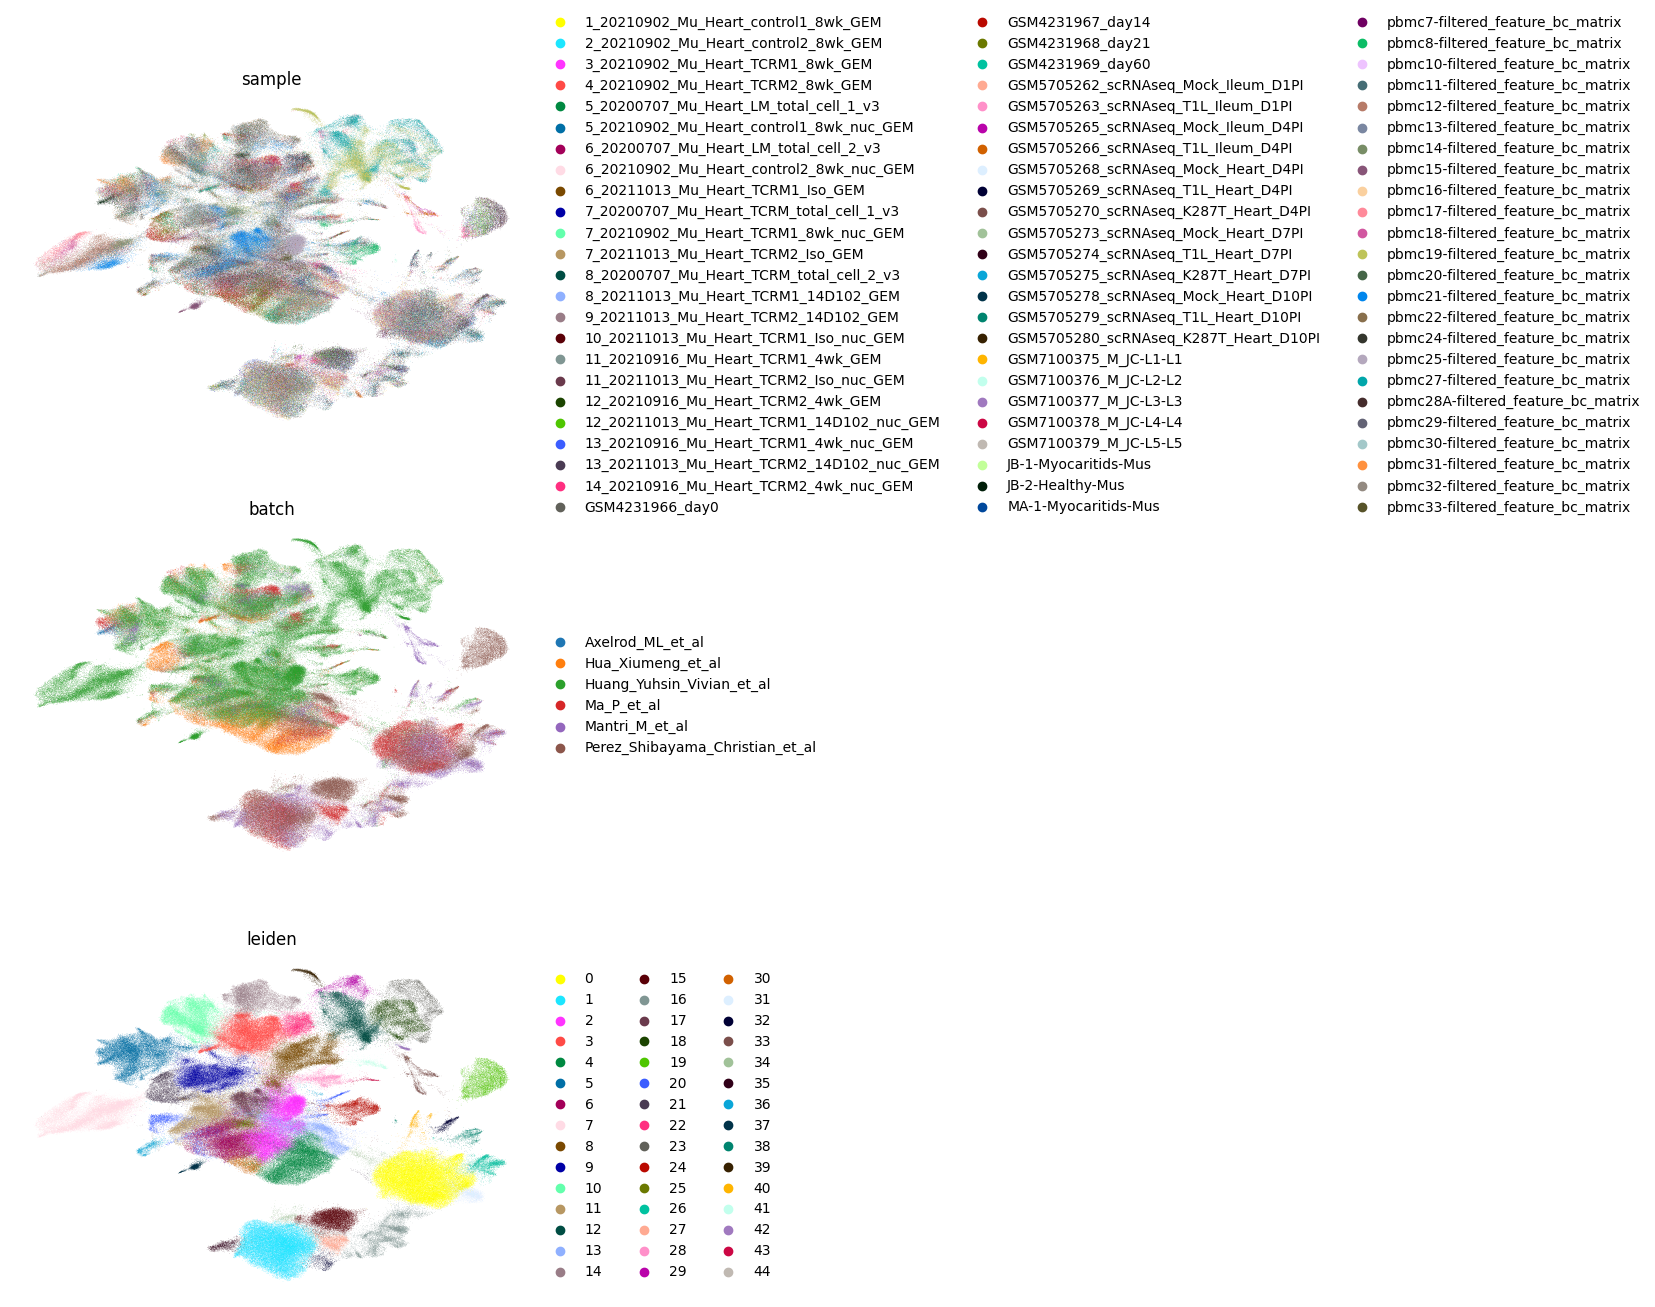

In [36]:
sc.settings.figdir = "../Figures"
sc.pl.umap(combined_adata,
           color=["sample","batch","leiden"],
           frameon=False,
           ncols=1,
           save = "UMAP-sample-batch-leiden(Combined).pdf"
           )